In [1]:
# from src.translation_utils import *
from src.dataset_utils import *
from src.cot_utils import *

import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\maras\anaconda3\envs\llama\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
msvamp = get_dataset_df("msvamp","en")

# MSVAMP

In [3]:
msvamp_langs = ['en','fr','es','de','zh','ru','ja','sw']

# Arabic, Armenian, Bengali, Burmese, Greek, Hebrew, Hindi, Khmer, Lao, 
# Maithili, Malayalam, Marathi, Nepali, Tamil, Telugu, Thai, Tibetan, Urdu    
           

In [4]:
def extract_numeric_answer(inputstring):
    """
    Finds the numeric answer in the model's response.
    
    Parameters:
    inputstring: The model's response.

    Returns:
    String value of the last mentioned number.
    """
    if not isinstance(inputstring, str):
        return 0.0
    
    else:
        
        # Regular expression to find 'the answer is ' followed by a number
        match = re.search(r'The answer is (\b\d+(?:[,.]\d+)?\b)', inputstring,re.IGNORECASE)

        if match:
            # Extract the number after 'the answer is'
            number = match.group(1)
            number = number.replace(',', '') # 
            return pd.to_numeric(number, errors='coerce')
        
        else:
            numberlist = re.findall(r'\b\d+(?:[,.]\d+)?\b',inputstring)
            
            if len(numberlist) > 0:
                number = numberlist[-1]
                if number is not None:
                    number = number.replace(',', '') # 
                    return pd.to_numeric(number, errors='coerce')
            else:
                return 0.0
    
def get_results(df,task,response_loc):
    """
    Reads the response csv and calculates the accuracy for a model on a task.
    
    Parameters:
    df: orginial task English file with correct answer column.
    task: task name
    response_loc: string location of the response csv file.

    Returns:
    Accuracy score (%)
    """
    response = pd.read_csv(response_loc,sep=';',header=None)
    response.rename(columns={0:'response'},inplace=True)
    response = response.map(lambda x: x.replace('\n', ' ') if isinstance(x, str) else x)

    answer_list = []

    if task == 'xcopa' or task == 'xstorycloze' or task == 'coinflip' or task == 'shuffled_objects':

        for i in range(len(response)):
            answer = extract_abc_answer(response.iloc[i,0])
            print(i,answer)
            answer_list.append(answer)

        response['answer'] = answer_list

        return calculate_accuracy(df,response,task)
    
    elif task == 'mgsm' or task == 'msvamp':

        for i in range(len(response)):
            answer = extract_numeric_answer(response.iloc[i,0])
            answer_list.append(answer)
        # print(answer_list)
        response['answer'] = answer_list

        return calculate_accuracy(df,response,task)

In [5]:
# Basic English & native instruction

msvamp_basic_llama_eng_instr = [get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_English_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_French_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Spanish_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_German_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Chinese_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Russian_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Japanese_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Swahili_basic_instr_English.csv')
                                ]


msvamp_basic_llama_native_instr = [get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_English_basic_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_French_basic_instr_French.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Spanish_basic_instr_Spanish.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_German_basic_instr_German.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Chinese_basic_instr_Chinese.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Russian_basic_instr_Russian.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Japanese_basic_instr_Japanese.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Swahili_basic_instr_Swahili.csv')
                                ]
 

msvamp_cot_llama_eng_instr = [get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_English_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_French_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Spanish_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_German_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Chinese_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Russian_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Japanese_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Swahili_cot_instr_English.csv')
                                ]

msvamp_cot_llama_native_instr = [get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_English_cot_instr_English.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_French_cot_instr_French.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Spanish_cot_instr_Spanish.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_German_cot_instr_German.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Chinese_cot_instr_Chinese.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Russian_cot_instr_Russian.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Japanese_cot_instr_Japanese.csv'),
                                get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-7b_msvamp_Swahili_cot_instr_Swahili.csv')
                                ]


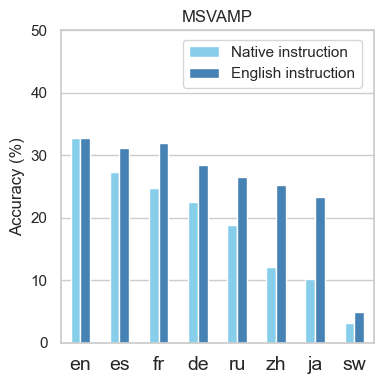

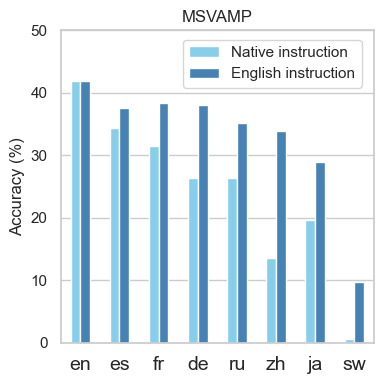

In [6]:
########### Native vs English instructions on native datasets

df1 = pd.DataFrame({'Language' : msvamp_langs,
                    'Native instruction (basic)' : msvamp_basic_llama_native_instr,
                    'English instruction (basic)' : msvamp_basic_llama_eng_instr,
                    'Native instruction (CoT)' : msvamp_cot_llama_native_instr,
                    'English instruction (CoT)' : msvamp_cot_llama_eng_instr
                    })
            

df1 = df1.sort_values('Native instruction (basic)', ascending=False)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plotting
df1.set_index('Language')[['Native instruction (basic)','English instruction (basic)']].plot(kind='bar', ax=ax,color=['skyblue','steelblue'],legend=None)

ax.set_title('MSVAMP')
ax.set_ylabel('Accuracy (%)')
ax.xaxis.grid(False)
ax.set_xlabel('')
ax.set_yticks(range(0,60,10))
ax.set_xticklabels(df1['Language'], rotation=0,fontsize=14)

labels = ['Native instruction', 'English instruction']
fig.legend(labels, bbox_to_anchor=(0.7, 0.9), loc='upper center', ncol=1, columnspacing=1)

plt.tight_layout()
plt.show()

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plotting
df1.set_index('Language')[['Native instruction (CoT)','English instruction (CoT)']].plot(kind='bar', ax=ax,color=['skyblue','steelblue'],legend=None)

ax.set_title('MSVAMP')
ax.set_ylabel('Accuracy (%)')
ax.xaxis.grid(False)
ax.set_xlabel('')
ax.set_yticks(range(0,60,10))
ax.set_xticklabels(df1['Language'], rotation=0,fontsize=14)

labels = ['Native instruction', 'English instruction']
fig.legend(labels, bbox_to_anchor=(0.7, 0.9), loc='upper center', ncol=1, columnspacing=1)

plt.tight_layout()
plt.show()



13b model

In [ ]:

# msvamp_basic_llama_eng_instr_13b = [get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_English_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_French_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Spanish_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_German_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Chinese_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Russian_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Japanese_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Thai_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Bengali_basic_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Swahili_basic_instr_English.csv')
#                                 ]

# msvamp_cot_llama_eng_instr_13b = [get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_English_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_French_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Spanish_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_German_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Chinese_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Russian_cot_instr_English.csv'),0,
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Japanese_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Thai_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Bengali_cot_instr_English.csv'),
#                                 get_results(msvamp,task="msvamp",response_loc='../results/msvamp/llama-2-13b_msvamp_Swahili_cot_instr_English.csv')
#                                 ]


In [20]:
# df = pd.DataFrame({'Language' : mgsm_langs + msvamp_langs,
#                    'Dataset' : ['MGSM'] * 11 + ['MSVAMP']*10,
#                     '7b' : mgsm_cot_llama_eng_instr + msvamp_cot_llama_eng_instr,
#                     '13b': mgsm_cot_llama_eng_instr_13b + msvamp_cot_llama_eng_instr_13b})

# df_long = pd.melt(df, id_vars=['Language', 'Dataset'], var_name='Model', value_name='Accuracy')

# g = sns.FacetGrid(df_long, col='Dataset', palette='tab20', hue='Language', height=5, aspect=0.5, legend_out=True)
# g = g.map(sns.lineplot, 'Model', 'Accuracy', marker='o')

# # Enhance the plot
# g.add_legend()
# g.set_axis_labels("Model scale", "Accuracy (%)")
# g.set_titles("{col_name}")
# for ax in g.axes.flat:
#     ax.set_yticks([0,10,20,30,40,50])
#     ax.yaxis.grid(True)  # Enable horizontal grid lines
#     ax.xaxis.grid(False) # Disable vertical grid lines

# plt.show()


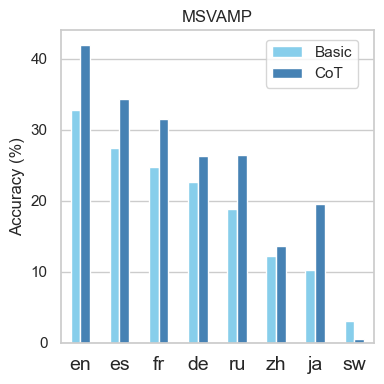

In [13]:
########### Native vs English instructions on native datasets

df1 = pd.DataFrame({'Language' : msvamp_langs,
                    'Native instruction (basic)' : msvamp_basic_llama_native_instr,
                    'Native instruction (CoT)' :msvamp_cot_llama_native_instr
                    })

df1 = df1.sort_values('Native instruction (basic)', ascending=False)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)

# Plotting
df1.set_index('Language')[['Native instruction (basic)','Native instruction (CoT)']].plot(kind='bar', ax=ax,color=['skyblue','steelblue'],legend=None)

ax.set_title('MSVAMP')
ax.set_xlabel('')
ax.set_ylabel('Accuracy (%)')
ax.xaxis.grid(False)
ax.set_yticks(range(0,50,10))
ax.set_xticklabels(df1['Language'], rotation=0,fontsize=14)

labels = ['Basic', 'CoT']
fig.legend(labels, bbox_to_anchor=(0.8, 0.9), loc='upper center', ncol=1, columnspacing=1)

plt.tight_layout()
plt.show()
